In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/pc/Desktop/ML/spam.csv", encoding='latin1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4491,ham,Probably a couple hours tops,NaN,NaN,NaN
2389,ham,Boo. How's things? I'm back at home and a litt...,NaN,NaN,NaN
3390,ham,"I'm in a meeting, call me later at",NaN,NaN,NaN
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN
5242,ham,Hmm thinking lor...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Data cleaning
# EDA exploritory data analysis
# text pre processing
# model building
# evaulation
# improvemnets
# website 
# deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
3191,ham,Is ur paper today in e morn or aft?
4718,ham,Aiyo... Her lesson so early... I'm still sleep...
3503,ham,Will you be here for food
4042,ham,I am literally in bed and have been up for lik...
4581,ham,Wow didn't think it was that common. I take it...


In [9]:
# renaming the columns
df.rename(columns={'v1': 'target','v2': 'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
2138,ham,K still are you loving me.
3374,ham,:)
1165,ham,"Haha yeah I see that now, be there in a sec"
4891,ham,Miserable. They don't tell u that the side eff...
2060,ham,I did. One slice and one breadstick. Lol


In [11]:
# lable encoder for harm or spam

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']= encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x214f7929610>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

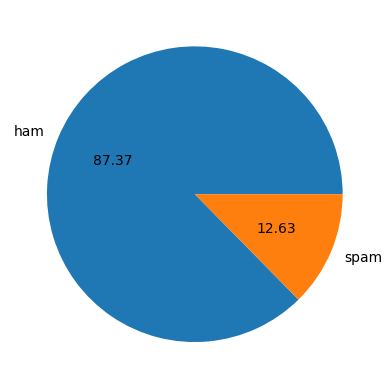

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [24]:
# Data is imbalanced
# this is all for analysis as we are understanding our data 

import nltk

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))   # hr word ka token bana lambda ka function use kr k
df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # hr word ko count kr rahy 


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x))) # sentence ki base pr tokenization

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] ==0] [['num_characters','num_words','num_sentences']].describe() # only for  ham message


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] ==1] [['num_characters','num_words','num_sentences']].describe() # only for spam message


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
# same cheez ko ab plot k zaryee dekhen gy histogram bana kr 

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

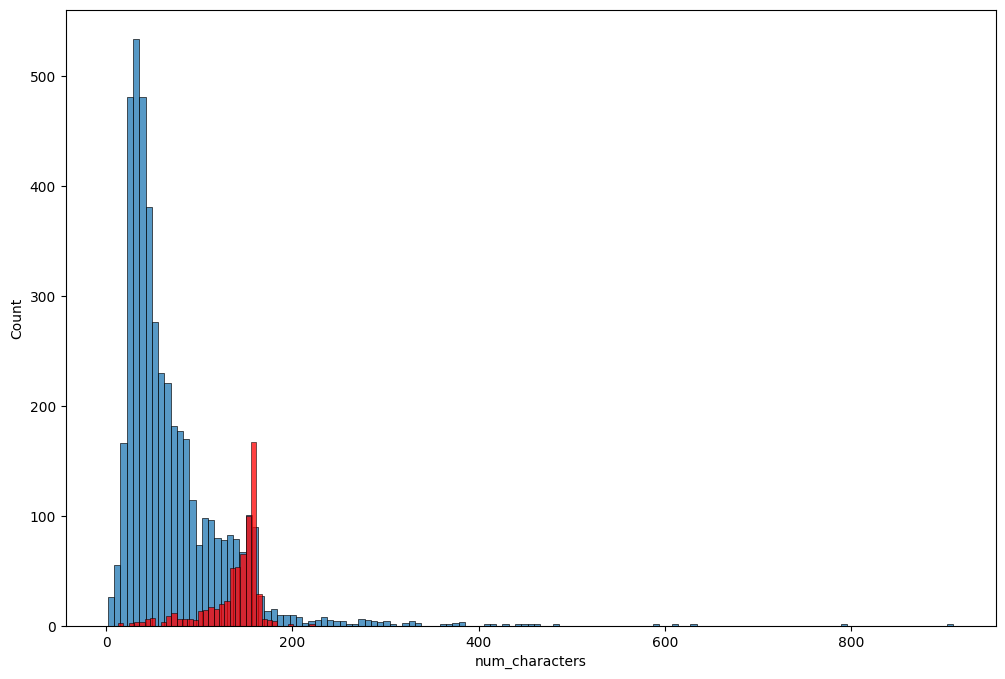

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

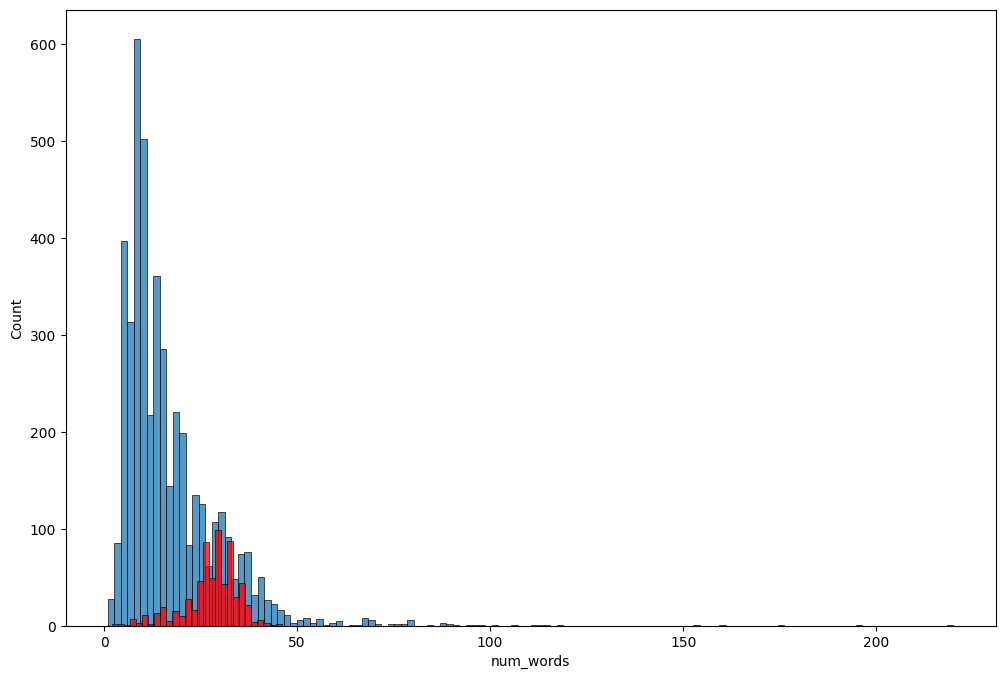

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color='red')

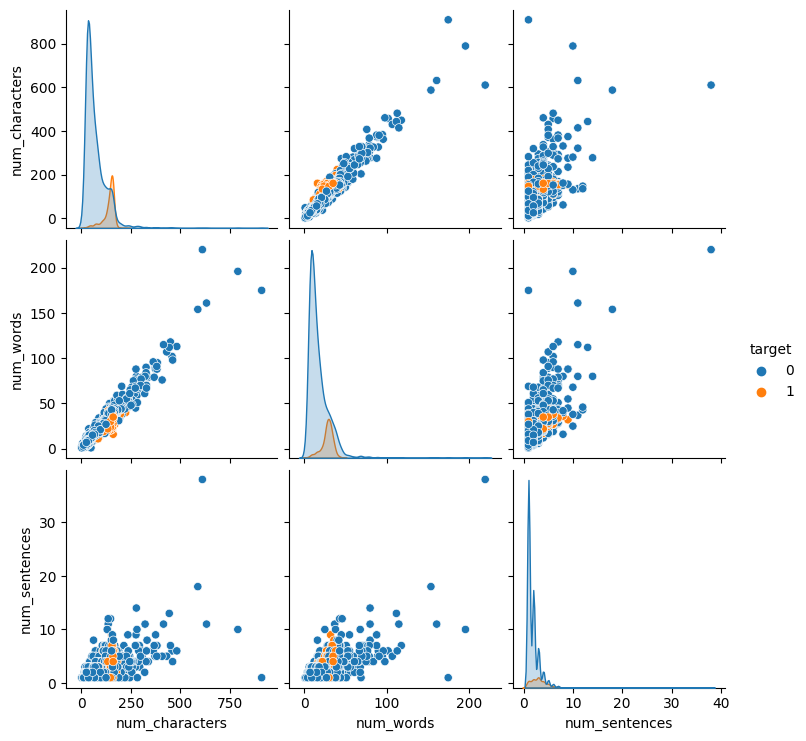

In [37]:
# now we see number columns's relation such as number of words ka no of sentence ka etc
sns.pairplot(df,hue='target')
# in this their are lots of outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_12836\217139293.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

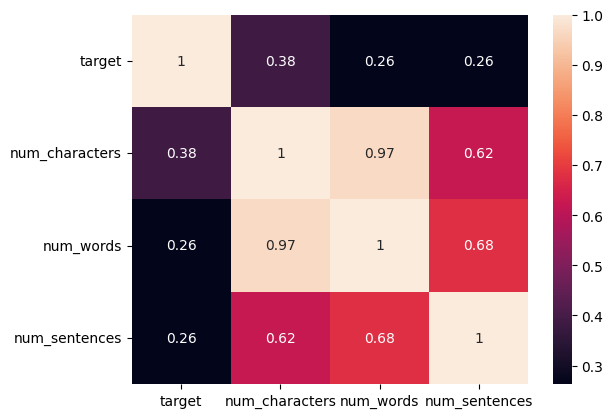

In [38]:
#corealtion co-effiecint

sns.heatmap(df.corr(),annot=True)

In [39]:
# yahan pr 3ino mein sy aik column len gy or charachter wala coulmn len gy kiun k us ka target k sath variation 0.38 hai 


## 3.Data Preprocessing

   . Lower case
   . Tokenization
   . Removing special characters
   . Removing stop words and punctuation
   . stemming (dance ,dancing,danced aik he kr dy ga)

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [43]:
def transform_text(text):
    text = text.lower()  #lowercase done
    text = nltk.word_tokenize(text) #2nd step done tokenization
    y =[]
    for i in text:
        if i. isalnum():    # removing special charchter and append into y list
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #removing stop words and punctuation
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))     # steming removing
    return " ".join(y)
        

In [44]:
transform_text("I loved the lectures of machine learning hw about you?")

'love lectur machin learn hw'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# now making word cloud of spam messages and from here we use from df the columns target and transformed_text
from wordcloud import WordCloud
wc =  WordCloud(width=500,height=500,min_font_size=10,background_color="white")


In [48]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

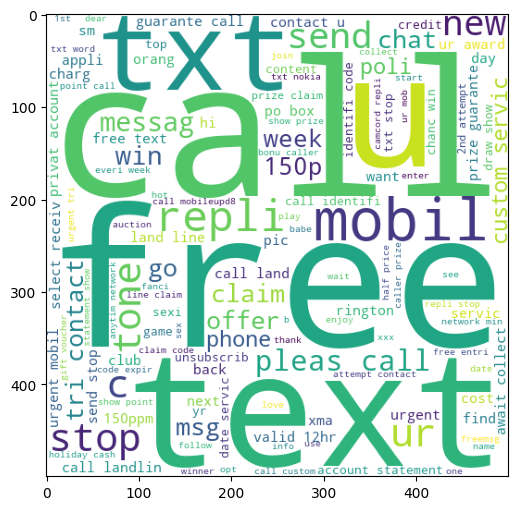

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

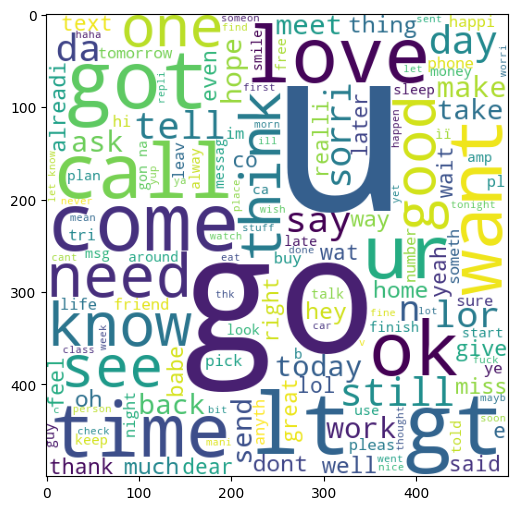

In [51]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [52]:
# now look top 30 words in ham and spam ;

spam_corpus = []
for msg in df[df['target'] == 1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

In [54]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()'''

"from collections import Counter\nsns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[0])\nplt.xticks(rotation='vertical')\nplt.show()"

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
ham_corpus = []
for msg in df[df['target'] == 0] ['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

In [58]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()'''

"from collections import Counter\nsns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[0])\nplt.xticks(rotation='vertical')\nplt.show()"

## 4. Model Building

In [59]:
## textual pr sab sy acha navie base algo kam krta hai 
#isy numerical input chahy hota hai
#text ko number ya vectors mein convert krna ho ga 
# 2 tareeky hn vactr krny k text ko backofwords frequent words ka colmn hr sms mein check krty hn tu wo f_number kitni br aa raha  jo number aty wo vector ban jaty 

# we start with backofwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #20% for test 

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB   #sary algo import keye hn kiu k data ka distribution ni pata
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# ye humara gnb ka out put hona 
#ye acha kam ni kr raha

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

# acuracy tu theek hai liken precision_score acha ni hai kiun k imbalance data hai accuracy sy zeada precision_score metter krta hai

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# ye acha kam kr raha so  

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [71]:
# i change vectorzation and choose tTidf method and got mnb is working very good
# i will go with mnb  # just for this project i will go for it 


In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))